# 1. Data Collection and Manipulation

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image

folder_path = "./archive/"

In [2]:
# fixing random seed for better reproducibility
seed_value = 123
tf.keras.utils.set_random_seed(seed_value)

In [3]:
# Create a df with labels and corresponding image name
csv_file_name = "Training_set.csv"
df = pd.read_csv(os.path.join(folder_path, csv_file_name))

# select only 10 class for classification
selected_species = ['CRECENT',
                    'ATALA',
                    'ORANGE TIP',
                    'MOURNING CLOAK', 
                    'MILBERTS TORTOISESHELL',
                    'SCARCE SWALLOW',
                    'SLEEPY ORANGE', 
                    'RED CRACKER',
                    'BANDED ORANGE HELICONIAN', 
                    'BROWN SIPROETA', 
                    ]

df = df[df['label'].str.upper().isin(selected_species)].reset_index(drop=True)
#display(df)

In [4]:
# Check if the image format is valid and verify if TensorFlow can load the image, otherwise mark it as invalid.

images_path = "train"
images_folder_path = os.path.join(folder_path, images_path)
invalid_images = []
dataset = []
target_size = (100, 100)

# I can check all extension supported from PIL 
supported_exts = tuple(ext.lower() for ext in Image.registered_extensions().keys())

for filename in df['filename']:
    file_path = os.path.join(images_folder_path, filename)
    print(filename)
    if os.path.isfile(file_path):
        
        # Check if the file extension is a supported image format
        if not filename.lower().endswith(supported_exts):
            print(f"Invalid Extension for {filename}.")
            invalid_images.append(filename)
            continue

        # Try loading and preprocessing the image
        try:
            img = tf.keras.preprocessing.image.load_img(file_path, target_size=target_size)  # Load the image and resize to the target dimensions
            numeric_img = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to a numeric array
            numeric_img = numeric_img / 255.  # Normalize pixel values to range [0, 1]
            dataset.append(numeric_img)  # Add the preprocessed image to the dataset
        except Exception as e:
            print(f"Error loading {filename}: {e}.")
            invalid_images.append(filename)
    else:
        print(f"Skipping {filename}, not a file.")
print()
print("images checked")
dataset_np = np.array(dataset)

print()
print("Invalid images list:", invalid_images)

# Update the df with valid images only
df = df[~df['filename'].isin(invalid_images)].reset_index(drop=True)


#-------------------------------------------------------------------
# Delete invalid images from disk (uncomment to enable deletion)

# for invalid_file in invalid_images:
#     file_path = os.path.join(images_folder_path, invalid_file)
#     try:
#         os.remove(file_path)
#         print(f"Deleted: {invalid_file}")
#     except Exception as e:
#         print(f"Failed to delete {invalid_file}: {e}")

Image_3.jpg
Image_9.jpg
Image_30.jpg
Image_45.jpg
Image_53.jpg
Image_59.jpg
Image_72.jpg
Image_73.jpg
Image_74.jpg
Image_92.jpg
Image_97.jpg
Image_104.jpg
Image_105.jpg
Image_107.jpg
Image_111.jpg
Image_120.jpg
Image_129.jpg
Image_141.jpg
Image_143.jpg
Image_148.jpg
Image_150.jpg
Image_153.jpg
Image_170.jpg
Image_177.jpg
Image_191.jpg
Image_198.jpg
Image_211.jpg
Image_212.jpg
Image_220.jpg
Image_225.jpg
Image_234.jpg
Image_237.jpg
Image_251.jpg
Image_253.jpg
Image_259.jpg
Image_266.jpg
Image_272.jpg
Image_275.jpg
Image_276.jpg
Image_278.jpg
Image_283.jpg
Image_286.jpg
Image_292.jpg
Image_295.jpg
Image_297.jpg
Image_309.jpg
Image_313.jpg
Image_317.jpg
Image_323.jpg
Image_334.jpg
Image_341.jpg
Image_349.jpg
Image_359.jpg
Image_373.jpg
Image_375.jpg
Image_380.jpg
Image_381.jpg
Image_382.jpg
Image_391.jpg
Image_397.jpg
Image_398.jpg
Image_403.jpg
Image_406.jpg
Image_408.jpg
Image_413.jpg
Image_430.jpg
Image_443.jpg
Image_448.jpg
Image_454.jpg
Image_458.jpg
Image_471.jpg
Image_472.jpg
Image

In [5]:
# Create array for labels
labels = df['label'].values

# change from string label to numeric label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

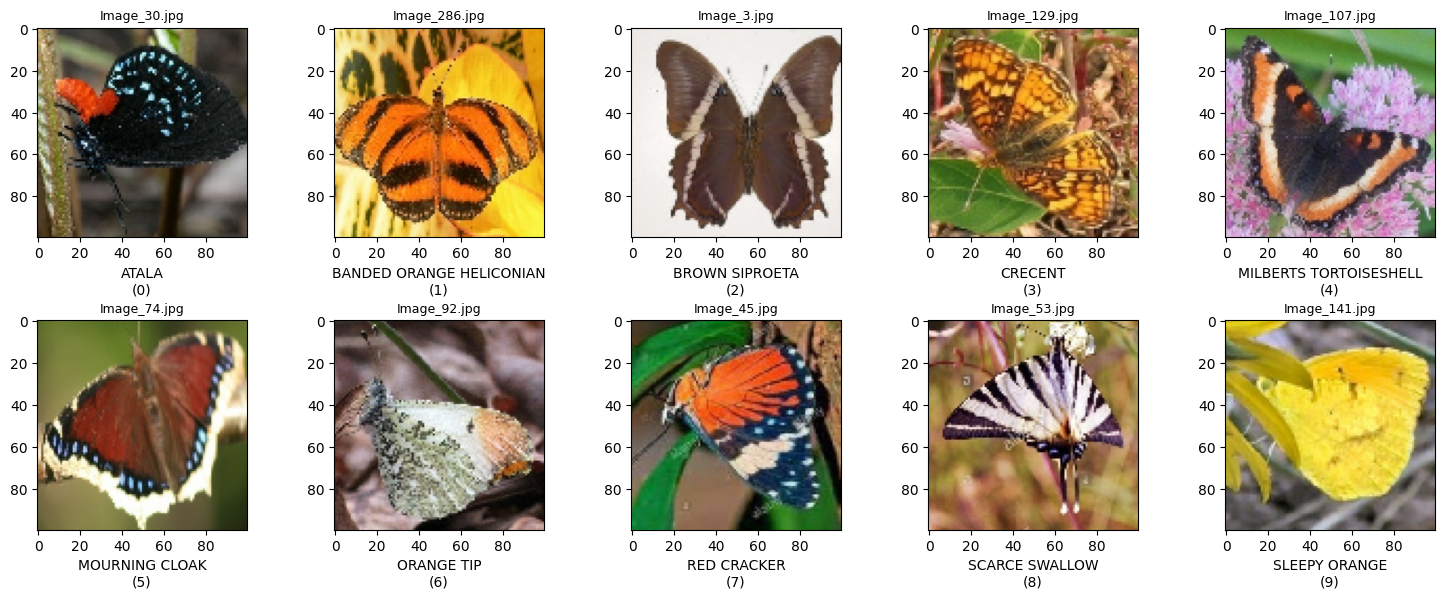

In [6]:
# A figure showing all classes sorted by index (used in report)

class_label_pairs = [(class_name, le.transform([class_name])[0]) for class_name in selected_species]
class_label_pairs.sort(key=lambda x: x[1])  # sort label

plt.figure(figsize=(15, 6))

for class_idx, (class_name, label_num) in enumerate(class_label_pairs):
    # choose first vald example
    sample_idx = df[df['label'].str.upper() == class_name].index[0]
    
    plt.subplot(2, 5, class_idx + 1)
    plt.imshow(dataset_np[sample_idx])
    plt.title(df.loc[sample_idx, 'filename'], fontsize=9)
    plt.xlabel(f"{class_name}\n({label_num})")
    #plt.axis("off")

plt.tight_layout()
#plt.savefig("dataset_preview.png")
plt.show()

### Train Validation and Test
A split of 70% training, 15% validation, and 15% testing is chosen. The training and validation sets are used to fit the model and prevent overfitting, while the test set provides an unbiased assessment of the model’s performance.

In [7]:
#default shuffle is true, stratify=labels_encoded, stratify=y_temp

from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    dataset_np, labels_encoded, test_size=0.15, random_state=seed_value, stratify=labels_encoded)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=seed_value, stratify=y_temp) # here test size is to ensure that is 15% of total, so 17.6% of 85% of total
print("shape of X_train: ",X_train.shape)
print("shape of X_val: ",X_val.shape)
print("shape of X_test: ",X_test.shape)

X_train_size_original = X_train.shape[0]
print(X_train_size_original)

shape of X_train:  (711, 100, 100, 3)
shape of X_val:  (152, 100, 100, 3)
shape of X_test:  (153, 100, 100, 3)
711


# 2. Model Creation and Optimization

This paper illustrates how the performance of the constructed CNN varies with different hyperparameter settings. For this project, the hyperparameters chosen for variation were the dropout rate, the learning rate, and the lambda (L2 regularization parameter). Performing a full grid search would have been too computationally demanding, given the available hardware. Therefore, a two-step optimization approach was adopted: first, tuning the dropout rate, followed by a smaller grid search over the learning rate and the lambda.

### Generic parametric function

In [10]:
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

input_shape = (target_size[0], target_size[1], 3)
number_of_classes = len(selected_species)

# Generic parametric function to create the model
def build_cnn_model(
    input_shape,
    number_of_classes,
    kernel_size=(3, 3),  
    learning_rate=0.0001,    
    l2_reg=0.0,             
    dropout_rate=0.0        
):
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))

    model.add(layers.Conv2D(32, kernel_size, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, kernel_size, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(32, kernel_size, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten()) 
    
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    
    if dropout_rate > 0: 
        model.add(layers.Dropout(dropout_rate))
        
    model.add(layers.Dense(number_of_classes))

    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    return model
